In [1]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.cross_validation import KFold
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import spline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Simple Regression 

In [3]:
#Read data
regression_data = pandas.read_csv('./data/simple_regression_data.csv')

This data contains volume and price of a metal taken by different vendors at different time.

In [4]:
#Check initial data
regression_data.head()

,Volume,Price
0,4.690628,27.000389
1,4.235716,24.925126
2,4.626838,20.931068
3,6.166307,31.296321
4,3.433759,17.315909


First we plot the data

Text(0.5,1,'Price - Volume Data')

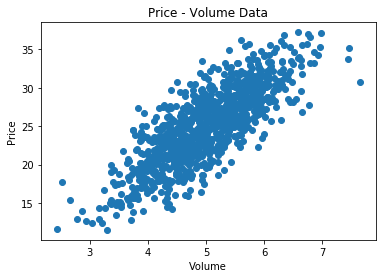

In [5]:
plt.scatter(regression_data['Volume'],regression_data['Price'])
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('Price - Volume Data')

In [6]:
#Divide the data into training and test set. train set contains 80% of the data. test set contains 20% of the data.
X_train, X_test, Y_train, Y_test = train_test_split(regression_data['Volume'], regression_data['Price'], test_size=0.20)

In [7]:
# Create linear regression object
simple_linear_regression = LinearRegression()

# Train the model using the training sets
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
simple_linear_regression.fit(pandas.DataFrame(X_train), pandas.DataFrame(Y_train))

# Make predictions using the testing set
Y_pred= simple_linear_regression.predict(pandas.DataFrame(X_test))

In [8]:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

Mean squared error: 8.9


In [9]:
print('R2 Score: %.2f' % r2_score(Y_test,Y_pred))

R2 Score: 0.66


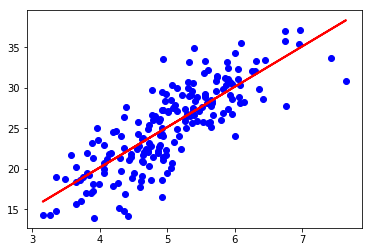

In [10]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2,)

## Multiple Regression 

In this task we will use Boston housing data and perform multiple regression. This dataset are part of StatLib Library maintained at Carnegie Mellon University. It is created by Harrison, D. and Rubinfeld, D.L.,J. Environ. This dataset contains 13 continuous attribute and one binary class attribute. Total 506 instances are present.

Scikit learn contains this dataset by default. We will use that.

In [11]:
#First load the data from scikit-learn
boston_data = load_boston()

In [12]:
#boston_data is a dictionary. First check the keys
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [13]:
#We can get the description of boston_data using DESCR
boston_data.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

Here is the description of the data

-  CRIM : crime rate per capita
-  ZN : proportion of residential land zoned
-  INDUS : proportion of non-retail business acres
-  CHAS : binary variable. 1 for tract bounds river and 0 otherwise
-  NOX : nitric oxides concentration
-  RM : average number of rooms
-  AGE : Owner occupied units 
-  DIS : weighted distance to employment centers.
-  RAD : index of accessibility
-  TAX : full value property tax rate
-  PTRATIO : pupil-teacher ratio
-  B : proportion of blacks
-  LSTAT : lower status of population
-  MEDV : owner occupied homes

In [14]:
#Get the attributes or features of the data
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='<U7')

We have the data and respective column names. We can convert this to pandas dataframe.

In [15]:
boston_data_frame = pandas.DataFrame(boston_data.data,columns=boston_data.feature_names)

In [16]:
boston_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Data contains price as the target variable. We can add that also in our dataframe.

In [17]:
boston_data_frame['Price'] = boston_data.target

In [18]:
boston_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we have the data. We will do some feature engineering on it and apply regression techniques.

In [19]:
#First check for missing information.
boston_data_frame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

No attribute contains null value. So we don't need to do anything to handle missing values.

In [20]:
#We can separate dependent and independent variables
boston_data_X = boston_data_frame[boston_data_frame.columns[0:13]]
boston_data_Y = boston_data_frame[boston_data_frame.columns[13:14]]

In [21]:
#Check the correlation
boston_data_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


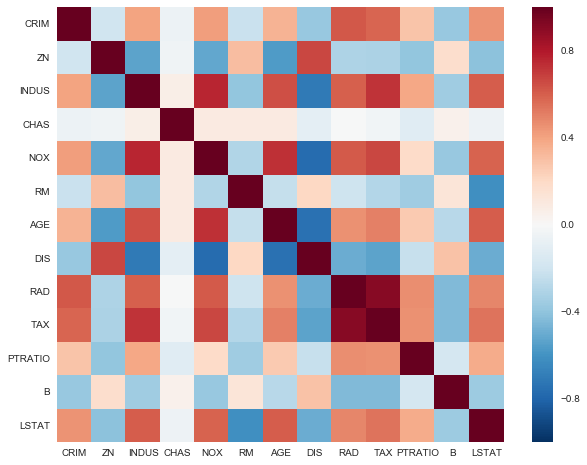

In [22]:
#Visualize correlation between attributes using heatmap
seaborn.heatmap(boston_data_X.corr()) 

Feature contains high correlation. We need to remove them first before apply regression techniques. 

In [23]:
# Create correlation matrix
abs_corr_matrix = boston_data_X.corr().abs()

# Select upper triangle of matrix
up_tri = abs_corr_matrix.where(numpy.triu(numpy.ones(abs_corr_matrix.shape), k=1).astype(numpy.bool))

# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.75)]

#Print correlated_features
print(correlated_features)

['NOX', 'DIS', 'TAX']


In [24]:
#Drop features
boston_data_X = boston_data_X.drop(correlated_features, axis=1)

In [25]:
#Divide the data into training and test set. train set contains 80% of the data. test set contains 20% of the data.
X_train, X_test, Y_train, Y_test = train_test_split(boston_data_X, boston_data_Y, test_size=0.20)

In [26]:
#Create object of multiple linear regression
linear_regression = LinearRegression()

In [27]:
#Fit the model
linear_regression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#Make prediction on test data
Y_pred = linear_regression.predict(X_test)

In [29]:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

Mean squared error: 18.6


In [30]:
print('R2 Score: %.2f' % r2_score(Y_test,Y_pred))

R2 Score: 0.81


In [31]:
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test,Y_pred))

Mean absolute error: 3.27


In [32]:
# Compare actual value and predicted value
Y_test['Pred'] = Y_pred
Y_test['Difference'] = abs(Y_test['Pred'] - Y_test['Price'])
Y_test.head()

,Price,Pred,Difference
472,23.2,21.851076,1.348924
321,23.1,25.198087,2.098087
98,43.8,33.259309,10.540691
467,19.1,15.857120,3.242880
101,26.5,25.283861,1.216139


In [33]:
# We can calculate error using K fold cross validation
kfold = KFold(len(boston_data_frame),n_folds=10,shuffle=True)
mean_abs_errors = list()
for train,test in kfold:
    linear_regression.fit(boston_data_X.ix[train],boston_data_Y.ix[train])
    Y_test = boston_data_Y.ix[test]
    Y_pred = linear_regression.predict(boston_data_X.ix[test])
    mean_abs_errors.append(mean_absolute_error(Y_test,Y_pred))
print('10 Fold Cross validation Error',numpy.mean(mean_abs_errors))

10 Fold Cross validation Error 3.60646658735
